In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

In [2]:
# import data
df_houses = pd.read_csv('houses.csv')
test = pd.read_csv('houses_test.csv')

In [3]:
df_houses.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,0,2,2008,WD,Normal,208500
1,1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,0,5,2007,WD,Normal,181500
2,2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,0,9,2008,WD,Normal,223500
3,3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,0,2,2006,WD,Abnorml,140000
4,4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_houses.drop(columns =['Unnamed: 0', 'Id'], inplace=True)
test.drop(columns =['Unnamed: 0', 'Id'], inplace=True)

In [5]:
q5, q95 = df_houses.quantile(.005, axis=0), df_houses.quantile(.995, axis=0)
iqr = q95 - q5
lower, upper = q5 - iqr * 1.5, q95 + iqr * 1.5



<ipython-input-6-5a5071ee216b>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  plt.hist((df_houses <= (q95 + iqr * 1.5)))
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


(array([[0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 1.459e+03],
        [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 1.459e+03],
        [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 1.459e+03],
        [1.459e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 1.459e+03],
        [1.459e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 1.459e+03],
        [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.

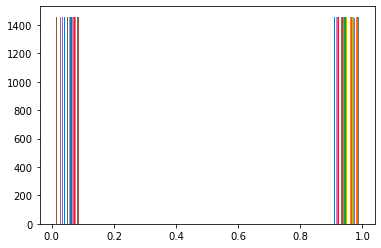

In [6]:
plt.hist((df_houses <= (q95 + iqr * 1.5)))

In [7]:
df_houses = df_houses[~((df_houses > (q95 + iqr * 1.5)).any(axis=1))]

<ipython-input-7-adb05e035b48>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_houses = df_houses[~((df_houses > (q95 + iqr * 1.5)).any(axis=1))]


In [8]:
df_houses

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,0,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,0,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,0,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,0,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,0,8,2007,WD,Normal,175000
1455,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,4,NaN,0,2,2010,WD,Normal,210000
1456,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,5,Shed,2500,5,2010,WD,Normal,266500
1457,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,0,4,2010,WD,Normal,142125


In [9]:
df_houses.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64

In [10]:
df_houses.columns.difference(test.columns)

Index(['SalePrice'], dtype='object')

In [11]:
# make dummies for catagorical features
df_train = pd.get_dummies(df_houses)


In [12]:
df_test = pd.get_dummies(test)


In [13]:
dif_test = df_train.columns.difference(df_test.columns).values

In [14]:
df_test[dif_test] = 0

In [15]:
df_test= df_test.drop(columns=['SalePrice'])

In [16]:
# split into train and test
X = df_train.drop("SalePrice", axis = 1)
y = df_train['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

In [17]:
from sklearn.preprocessing import RobustScaler 
scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<AxesSubplot:>

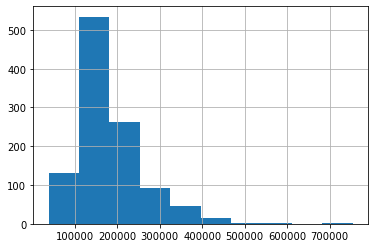

In [18]:
y_train.hist()

In [19]:
#start with a basic regression


model1 = LinearRegression()

model1.fit(X_train, y_train)

print('cv_score', np.mean(cross_val_score(model1, X_train, y_train, cv=5)))

y_pred= model1.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

cv_score -163594763225420.44


743461447426.4849

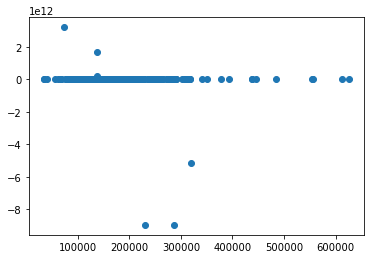

In [20]:
plt.scatter(y_test, y_pred)

In [21]:
y_dif = np.abs(y_test-y_pred )
y_dif.sort_values(ascending=False)[0:20]

1152    8.952100e+12
1024    8.952100e+12
595     5.161732e+12
1321    3.206771e+12
1003    1.684756e+12
944     2.112195e+11
898     1.650446e+05
1046    1.479498e+05
1169    1.352440e+05
440     1.213103e+05
1181    9.633925e+04
629     9.040269e+04
375     8.453684e+04
955     6.977153e+04
970     6.693116e+04
70      6.372922e+04
798     6.127544e+04
1131    5.746422e+04
1211    5.426350e+04
199     5.382525e+04
Name: SalePrice, dtype: float64

In [22]:
# need to check:
#   how the outliers afected model
#   how long model took to run

In [23]:
# try ridge and lasso regresions

param_grid = {}
model1_cv = GridSearchCV(model1, param_grid, cv=5)